## 严重违法失信企业名单信息公示数据

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv("Untrustworthy_list.csv", encoding="utf-8", header=1)
# 查看前几行
# print(df.head())
# 查看列名称
print(df.columns)

Index(['PRIPID', 'ENTNAME', 'UNISCID', 'REGNO', 'SERILLREA_CN', 'ABNTIME',
       'DECORG', 'REMEXCPRES_CN', 'REMDATE', 'RECORG', 'CD_OPERATION'],
      dtype='object')


## 1. 违法失信企业所占比例——饼图:

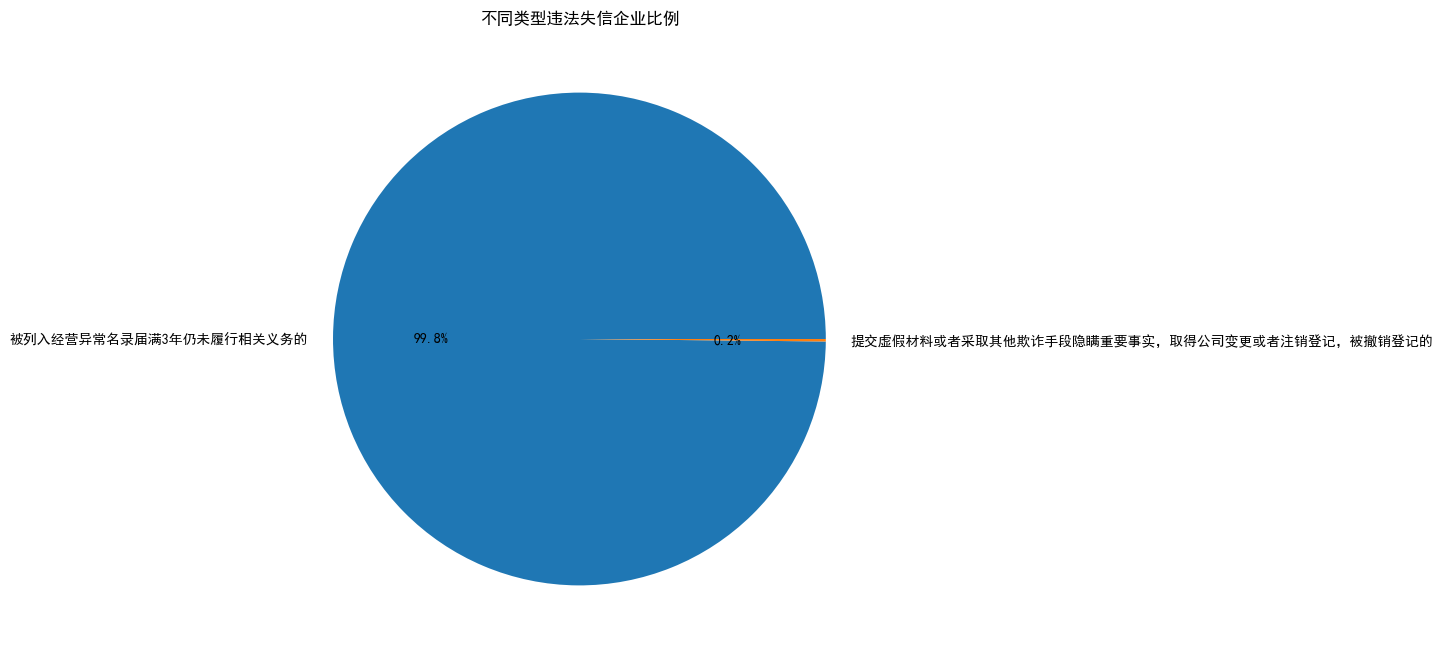

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 读取数据
data = pd.read_csv("Untrustworthy_list.csv", encoding="utf-8", header=1)

# 统计不同类型的违法失信企业数量
count = data['SERILLREA_CN'].value_counts()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('不同类型违法失信企业比例')
plt.show()

## 2. 违法失信企业数量的分布情况——柱状图:

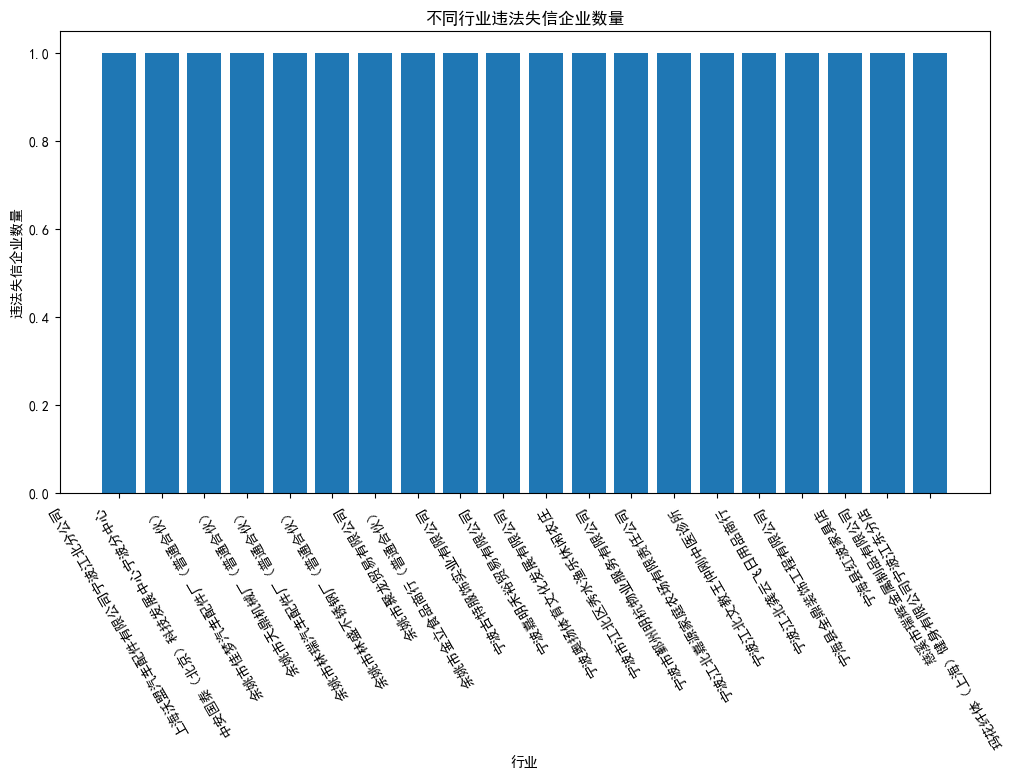

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('Untrustworthy_list.csv', encoding='utf-8', header=1)
data = data.head(20)
# 按照行业分组，并统计每个组的行数
counts = data.groupby('ENTNAME').count()['PRIPID']

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(counts.index, counts.values)

# 设置图形标题和轴标签
plt.title('不同行业违法失信企业数量')
plt.xlabel('行业')
plt.ylabel('违法失信企业数量')

plt.xticks(rotation=120)
plt.show()

## 3. 使用Pyecharts绘制地图,显示不同地区企业被列入经营异常名录的数量:
- [ ] 存在报错（df定义不能继承上面的）

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Map

count_df = df.groupby('地区').count()['ENTNAME']

c = (
    Map()
    .add("企业被列入经营异常名录数量", [list(z) for z in zip(count_df.index, count_df.values)], "浙江省")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同地区企业被列入经营异常名录的数量"),
        visualmap_opts=opts.VisualMapOpts(),
    )
)
c.render()

## 4. 使用Pyecharts绘制词云,显示表格中高频词:

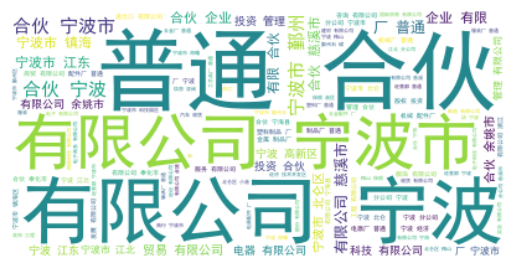

In [72]:
from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt

# 将企业名称拼接成一个字符串
text = ' '.join(df['ENTNAME'])

# 对中文进行分词
cut_text = ' '.join(jieba.cut(text))

# 生成词云图
wordcloud = WordCloud(background_color='white', font_path='SimHei.ttf').generate(cut_text)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()